In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat
%matplotlib inline

import sklearn
from sklearn import metrics
import pandas as pd
import scipy.sparse as sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from scipy import stats

import implicit
import random

#from tqdm import tqdm

In [56]:
# loads in all artist names to compare against
with open("artists.txt" , 'r') as f:
    lines = f.readlines()
artist_names = [x.strip() for x in lines]

In [57]:
# matrix with identity but no symmetry
no_sym = sparse.csr_matrix(sparse.load_npz('no_sym.npz')[:])
print(no_sym.shape)

(145955, 145955)


In [3]:
test_live = sparse.csr_matrix(sparse.load_npz('live.npz')[:])
print(test_live.shape)

(146050, 146050)


In [59]:
alpha = 15
live_model = implicit.als.AlternatingLeastSquares(factors=32, regularization=0.1, iterations=50)
live_model.fit((alpha*test_live).astype('double'))

100%|██████████| 50.0/50 [01:03<00:00,  1.37s/it]


In [19]:
# Train Implicit ALS Model on data
alpha = 15
sym_model = implicit.als.AlternatingLeastSquares(factors=32, regularization = 0.1, iterations=50)
sym_model.fit((no_sym*alpha).astype('double'))
sym_user_vecs = sym_model.user_factors
sym_item_vecs = sym_model.item_factors

100%|██████████| 50.0/50 [00:48<00:00,  1.02it/s]


In [114]:
print(artist_names.index("The Beatles"))

20447


# Testing for a single seed artist

In [115]:
#Creating a test 'selected artists' with one artist selected
test_seed = np.zeros(no_sym.shape[0])
test_seed[20448]=1

og_seed = no_sym[16083,:]

#Out of sample artist recommendation
use_item = sym_model.recommend(0, csr_matrix(test_seed),N=10, recalculate_user=True)
#with_full = sym_model.recommend(0, og_seed, N=10, recalculate_user=True)



In [10]:
# Print out recommendations for the single artist and the artists that are similar to that artist
def print_artists(scores):
    for item in range(0,len(scores)):
        print(str(artist_names[scores[item][0]-1])+" "+str(scores[item][1]) +" - "+ str(scores[item][0]))


In [117]:
print_artists(use_item)

Led Zeppelin 0.0032522386489351844 - 7766
The Band 0.003183191281445488 - 12698
Love 0.0031292302759887477 - 4422
The Kinks 0.0028920581728860595 - 12699
Queen 0.002737956278295213 - 11225
Jimi Hendrix 0.002726275066474113 - 7753
King Crimson 0.0027009934373283524 - 4420
Bachman-Turner Overdrive 0.0026759137795504878 - 2607
Don Henley 0.0026518129751474427 - 2595
Traffic 0.002504247683185352 - 4559


## Testing for the Implicit explain( ) function

In [124]:
total, top, weights = sym_model.explain(0, csr_matrix(test_seed), 7766)

print_artists(top)
    



The Beatles 0.0032522386489351853 - 20448


# Testing for multiple seed artists

In [8]:
first = artist_names.index("The Rolling Stones") + 1
second = artist_names.index("Grateful Dead") + 1
third = artist_names.index("") + 1

multi_seed = np.zeros(live_model.user_factors.shape[0])
multi_seed[first] = 1
multi_seed[second] = 1
multi_seed[third] = 1

multi_test = live_model.recommend(0, csr_matrix(multi_seed), N=, recalculate_user=True)

In [9]:
print_artists(multi_test)

Led Zeppelin 0.0005195717501492402 - 7766
The Band 0.0005084689314695547 - 12698
Love 0.0005052894552496101 - 4422
The Kinks 0.0004699800938399983 - 12699
Queen 0.0004519250654976027 - 11225
King Crimson 0.00043828443437773793 - 4420
Jimi Hendrix 0.00043282502377056924 - 7753
Bachman-Turner Overdrive 0.0004207866979215643 - 2607
Don Henley 0.00041676774428411136 - 2595
Descendent 0.000394727278181132 - 12697
The Velvet Underground 0.0003924041513682547 - 12702
Traffic 0.0003903777103867792 - 4559
Peter Frampton 0.0003878542496687696 - 4558
The J. Geils Band 0.00038778175762950223 - 2596
Microcosms 0.0003861282897519213 - 53019
Little River Band 0.0003832973694540801 - 2612
America 0.00038112366083270613 - 2906
Jackson Browne 0.0003766571657314561 - 2903
Dan Sadin 0.00037627308157962727 - 29255
Shana Cleveland 0.0003758100868312723 - 22080


In [13]:
total, top, weights = live_model.explain(0, csr_matrix(multi_seed), 12702)
print_artists(top)

The Rolling Stones 0.0003924041513682548 - 90350


In [17]:
num = 59313
print(artist_names[num])
print(artist_names[num-1])
print(artist_names[num+1])

Terry Tufts
Robokid
Reverend Billy C. Wirtz


## GRAPHING

In [4]:
alpha = 15
live_model = implicit.als.AlternatingLeastSquares(factors=32, regularization=0.1, iterations=25)
live_model.fit((alpha*test_live).astype('double'))

100%|██████████| 25.0/25 [00:29<00:00,  1.18s/it]


In [67]:
first = artist_names.index('Bob Marley & The Wailers') + 1
second = artist_names.index('Double Tiger') + 1
third = artist_names.index('The Beatles') + 1
fourth = artist_names.index('Kanye West') + 1

seed = np.zeros(live_model.user_factors.shape[0])
seed[first] = 1
seed[second] = 1
seed[third] = 1
seed[fourth] = 1

data = live_model.recommend(0, csr_matrix(seed), N=live_model.user_factors.shape[0], recalculate_user=True)

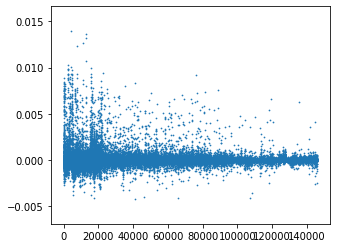

In [68]:
ids = []
scores = []
for rank in data:
    ids.append(rank[0])
    scores.append(rank[1])
    

sort = np.sort(scores)
#plt.plot(sort)
plt.figure(1, figsize=(5,4))
plt.scatter(ids, scores, s=0.5)

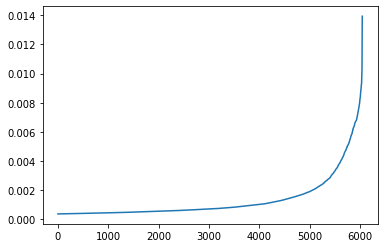

In [69]:
test = sort.copy()
info = test[140000:]
plt.plot(info)